# California House Price Prediction Project

In this project I developed an end to end machine learning project using linear regression.

Importing the required libraries for the project.

In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



Loading the California Housing dataset from the scikit-learn library

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x = housing.data
y = housing.target

data = pd.DataFrame(x, columns=housing.feature_names) # Using pandas to turn the dataset to a dataframe 
data["SalePrice"] = y 
data.head() # Getting the first 5 rows of the dataframe

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  SalePrice  
0    -122.23      4.526  
1    -122.22      3.585  
2    -122.24      3.521  
3    -122.25      3.413  
4    -122.25      3.422

Dataset Description

In [ ]:
print(housing.DESCR) 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(data.shape) # Getting the number of rows and columns in the dataset

(20640, 9)


This tells us that we have 20640 rows and 9 columns in the dataset.

In [ ]:
data.info() # Gives us the datatypes and checks if there are missing values in the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe() # Gives us the count,mean,standard deviation etc of the dataset

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude     SalePrice  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

## Exploratory Data Analysis of the Dataset

In [ ]:
data.isnull().sum() # Gives the sum of null values in the dataset columns. In this case there are none 

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

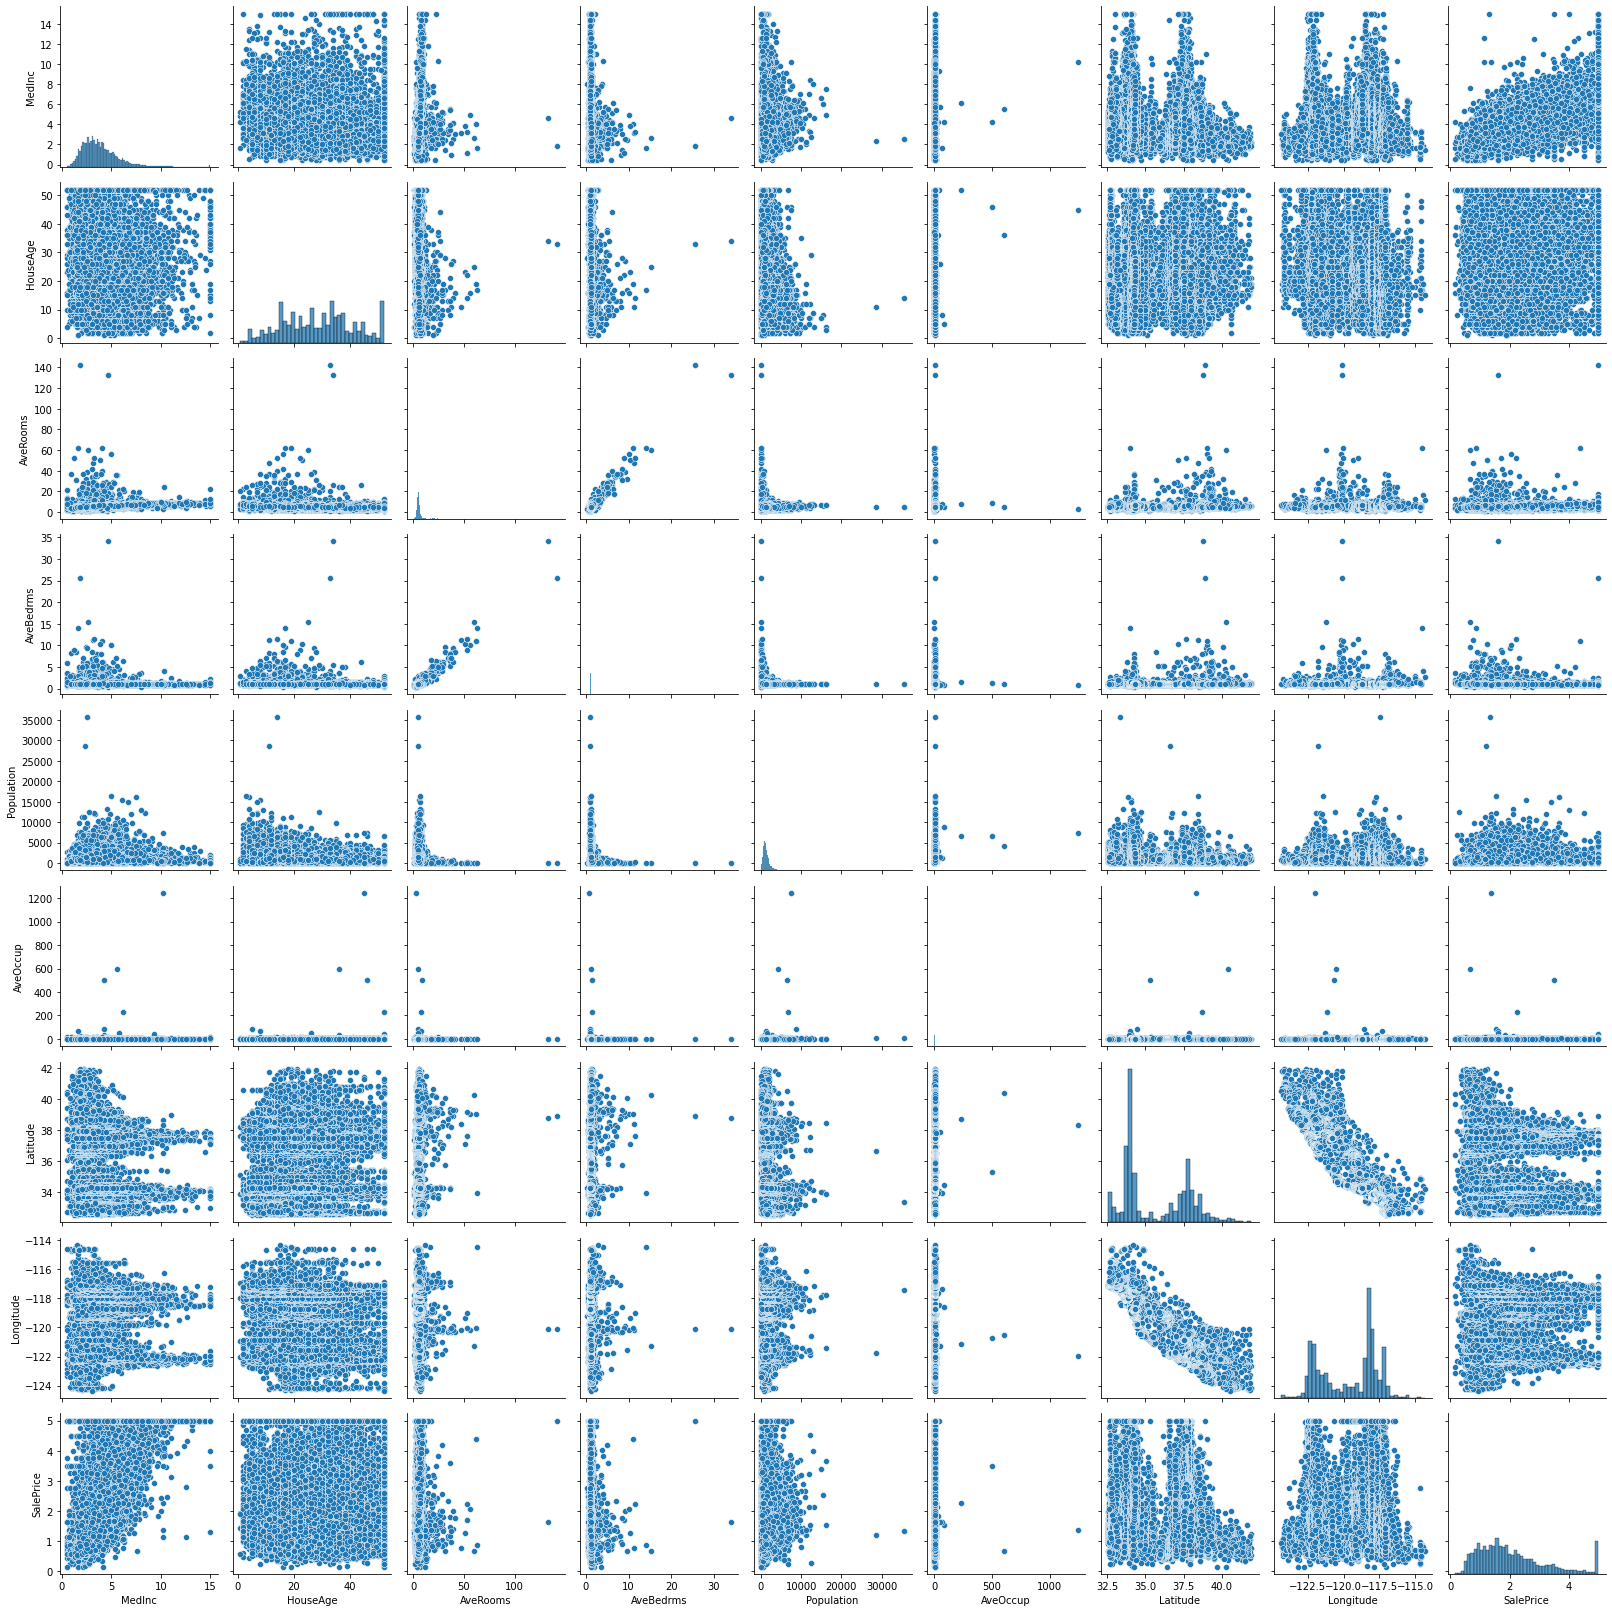

In [ ]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


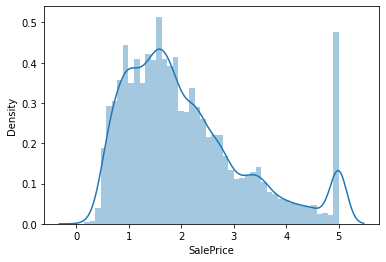

In [ ]:
sns.distplot(data['SalePrice']); # Getting the distribution plot

In [ ]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


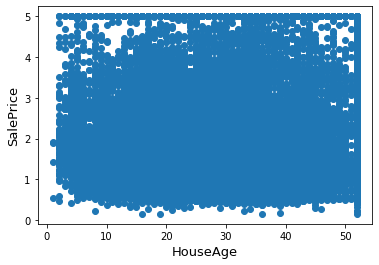

In [ ]:
# Plotting HouseAge against SalesPrice
fig, ax = plt.subplots()
ax.scatter(x = data['HouseAge'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('HouseAge', fontsize=13)
plt.show()

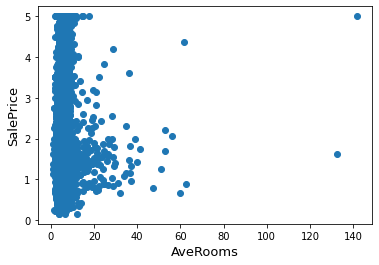

In [ ]:
# Plotting AveRooms against SalesPrice
fig, ax = plt.subplots()
ax.scatter(x = data['AveRooms'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('AveRooms', fontsize=13)
plt.show()

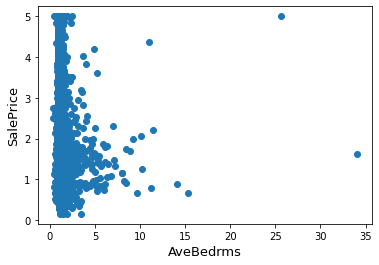

In [ ]:
# Plotting AveBedrms against SalesPrice
fig, ax = plt.subplots()
ax.scatter(x = data['AveBedrms'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('AveBedrms', fontsize=13)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu=2.07 and sigma = 1.15



<function matplotlib.pyplot.show>

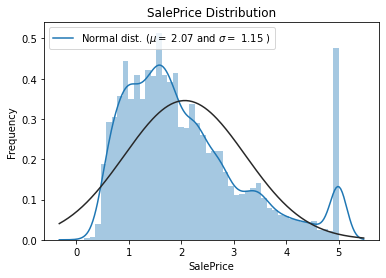

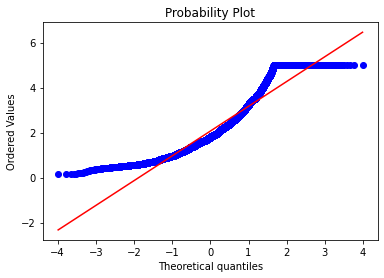

In [ ]:
from scipy import stats
from scipy.stats import norm, skew # For statistics Calculations

sns.distplot(data['SalePrice'], fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu={:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get also the QQ-plot
fig = plt.figure()
res=stats.probplot(data['SalePrice'], plot=plt)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu=1.06 and sigma = 0.36



<function matplotlib.pyplot.show>

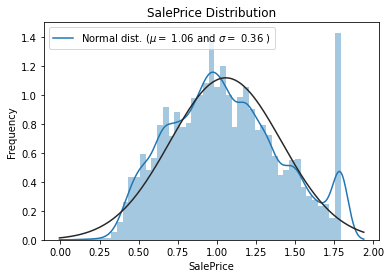

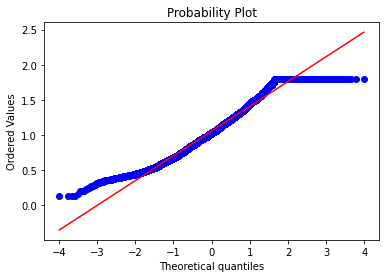

In [ ]:
data['SalePrice']=np.log1p(data['SalePrice'])

sns.distplot(data['SalePrice'], fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu={:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res=stats.probplot(data['SalePrice'], plot=plt)
plt.show

## Data Correlation

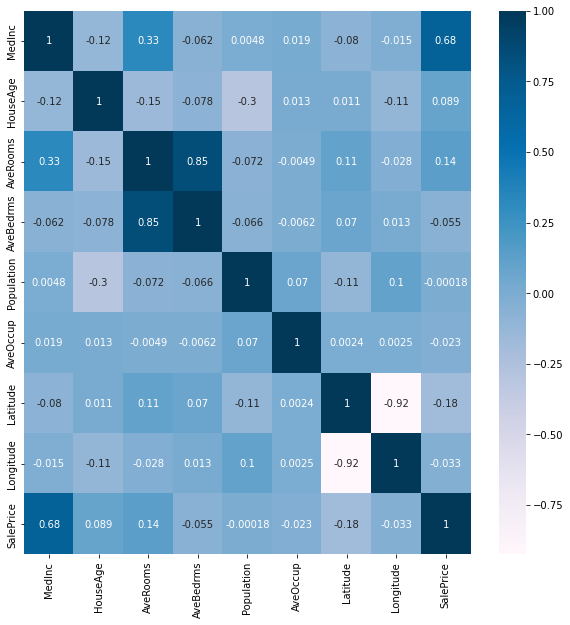

In [ ]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
cor_target = abs(cor['SalePrice']) # absolute value of correlation

relevant_features = cor_target[cor_target>0.2] # highly correlated features

names = [index for index, value in relevant_features.iteritems()] # getting the names of the features

names.remove('SalePrice') # removing the target feature

print(names) # printing the features
print(len(names))

['MedInc']
1


## Model Building

In [ ]:
# Dividing the data into training and test set
from sklearn.model_selection import train_test_split

x = data.drop('SalePrice', axis=1)
y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [ ]:
# Gives the number of rows and columns for The X test, training set and Y test, training set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
# Importing Linear Regression model from sklearn library
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # Instantiating the Linear Regression Object
lr.fit(x_train, y_train) # Fitting the model
lr.score(x, y) 
       

0.6224456400881904

In [ ]:
# Getting the predictions
predictions = lr.predict(x_test)

print('Actual value of the house:- $', y_test[0]*100000) # Present Value of the House in dollars
print("Model Predicted Value:-  $", predictions[0]*100000) # Predicted value of the House in dollars


Actual value of the house:- $ 170946.42265012246
Model Predicted Value:-  $ 62758.33553422849


In [ ]:
# To check the accuracy using Mean Squared Error and Root Mean Squared Error and Getting the R-Squared Value of Predictions.

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
print('Mean Squared Error= ', mse)
print('Root Mean Squared Error= ',rmse)

Rsquared=r2_score(y_test, predictions)
print('R^2 Value= ', Rsquared*100,'%')

Mean Squared Error=  0.05034011172872026
Root Mean Squared Error=  0.2243660217785221
R^2 Value=  60.061597228034614 %
